<a href="https://colab.research.google.com/github/SamH3pn3r/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_224_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [0]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [0]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [0]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [0]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
df = pd.merge(income,lifespan)
df.shape

(40437, 4)

In [0]:
more_df = pd.merge(df, population)
more_df.shape

(40437, 5)

In [0]:
entities_variables = ['country', 'name', 'world_6region']

entities = entities[entities_variables]

print(entities.shape)
entities.head()

(273, 3)


,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [0]:
mas_df = pd.merge(entities, more_df, left_on='country', right_on='geo')

print(mas_df.shape)
mas_df.head()

(40437, 8)


,country,name,world_6region,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,Afghanistan,south_asia,afg,1800,603,28.21,3280000
1,afg,Afghanistan,south_asia,afg,1801,603,28.20,3280000
2,afg,Afghanistan,south_asia,afg,1802,603,28.19,3280000
3,afg,Afghanistan,south_asia,afg,1803,603,28.18,3280000
4,afg,Afghanistan,south_asia,afg,1804,603,28.17,3280000


In [0]:
merged_df = mas_df.drop(['country','geo'], axis=1)
munge_df = merged_df.rename(index=str, columns = {
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income_per_person',
    'time': 'year',
    'life_expectancy_years': 'life_expect',
    'population_total': 'population',
    'world_6region': 'region',
    'name': 'country'})

munge_df.head()

,country,region,year,income_per_person,life_expect,population
0,Afghanistan,south_asia,1800,603,28.21,3280000
1,Afghanistan,south_asia,1801,603,28.20,3280000
2,Afghanistan,south_asia,1802,603,28.19,3280000
3,Afghanistan,south_asia,1803,603,28.18,3280000
4,Afghanistan,south_asia,1804,603,28.17,3280000


In [0]:
munge_df.dtypes

country               object
region                object
year                   int64
income_per_person      int64
life_expect          float64
population             int64
dtype: object

In [0]:
munge_df.describe(exclude='number')

,country,region
count,40437,40437
unique,187,6
top,Nigeria,europe_central_asia
freq,219,10778


## Explore data

In [0]:
munge_df.country.unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [0]:
munge_df.region.unique()

array(['south_asia', 'sub_saharan_africa', 'europe_central_asia',
       'middle_east_north_africa', 'america', 'east_asia_pacific'],
      dtype=object)

In [0]:
usa = munge_df[munge_df.country=='United States']
usa.head()

,country,region,year,income_per_person,life_expect,population
38028,United States,america,1800,2127,39.41,6801854
38029,United States,america,1801,2167,39.41,6933517
38030,United States,america,1802,2202,39.41,7067728
38031,United States,america,1803,2166,39.41,7204538
38032,United States,america,1804,2165,39.41,7343995


In [0]:
usa[usa.year.isin([1818, 1918, 2018])]

,country,region,year,income_per_person,life_expect,population
38046,United States,america,1818,2258,39.41,9879049
38146,United States,america,1918,9371,47.18,106721812
38246,United States,america,2018,54898,79.14,326766748


In [0]:
china = munge_df[munge_df.country=='China']
china[china.year.isin([1818,1918,2018])]

,country,region,year,income_per_person,life_expect,population
6854,China,east_asia_pacific,1818,985,32.00,374161494
6954,China,east_asia_pacific,1918,989,22.13,462444535
7054,China,east_asia_pacific,2018,16018,76.92,1415045928


## Plot visualization

<Figure size 432x288 with 0 Axes>

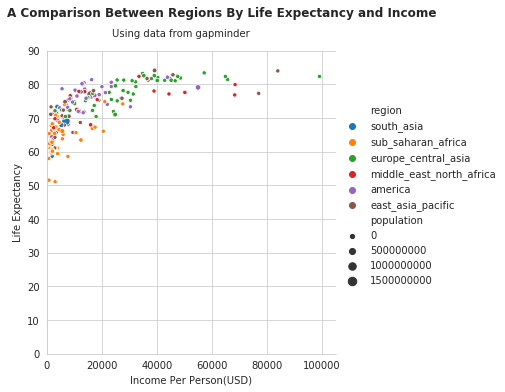

In [255]:
years = ['2018']
now = munge_df[munge_df.year.isin(years)]

fig = plt.figure();

ax = sns.relplot(x='income_per_person', y='life_expect', hue='region',
           size='population', data=now);

ax.set_axis_labels("Income Per Person(USD)", "Life Expectancy");

plt.xlim((0,105000));
plt.ylim((0,90));

ax.fig.text(x=0.05, y=1.055, s="A Comparison Between Regions By Life Expectancy and Income", fontsize= 12, weight='bold');
ax.fig.text(x=.25, y=1, s="Using data from gapminder", fontsize=10);

plt.show(ax1);

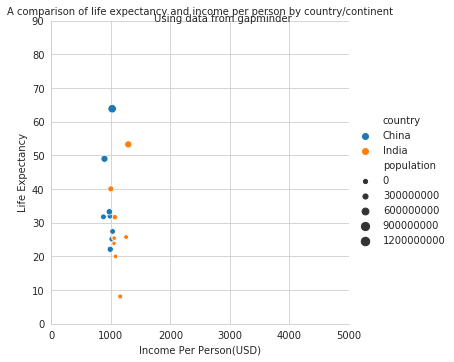

In [0]:
#My practice

countries = ['China', 'India']
years = ['1818', '1838', '1858', '1878', '1898', '1918', '1938', '1958', '1978', '1998' '2018']

country_prog = munge_df[(munge_df.country.isin(countries)) & (munge_df.year.isin(years))]

ax = sns.relplot(x='income_per_person', y='life_expect', hue='country', 
                 size='population', data=country_prog);

ax.set_axis_labels("Income Per Person(USD)", "Life Expectancy")

sns.set_style('whitegrid')
sns.despine()

plt.xlim((0,5000))
plt.ylim((0,90))

plt.title("A comparison of life expectancy and income per person by country/continent", fontsize=10)
plt.suptitle("Using data from gapminder", fontsize=10)

plt.show(ax);

In [0]:
sqatar = munge_df[munge_df.income_per_person > 80000].sort_values(by='income_per_person')
qatar

,country,region,year,income_per_person,life_expect,population
892,United Arab Emirates,middle_east_north_africa,1988,80052,72.57,1655849
20201,Kuwait,middle_east_north_africa,1978,80133,70.63,1227601
31891,Singapore,east_asia_pacific,2014,80305,83.39,5448342
20219,Kuwait,middle_east_north_africa,1996,80454,75.85,1631740
20226,Kuwait,middle_east_north_africa,2003,80463,77.16,2169118
5513,Brunei,east_asia_pacific,2010,80553,77.08,388662
5501,Brunei,east_asia_pacific,1998,80813,75.54,319222
31892,Singapore,east_asia_pacific,2015,80892,83.58,5535262
31199,Saudi Arabia,middle_east_north_africa,1979,80944,70.52,9179621
20218,Kuwait,middle_east_north_africa,1995,81017,76.20,1610651


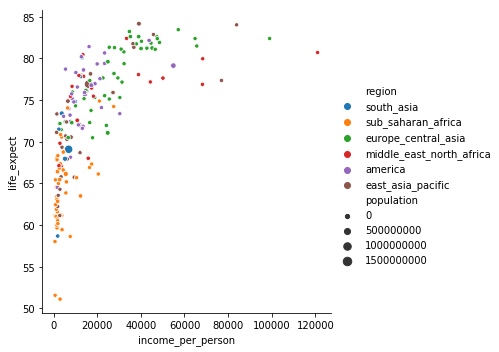

In [0]:
sns.relplot(x='income_per_person', y='life_expect', hue='region', 
            size='population', data=now);
plt.text(x=qatar.income_per_person-5000, y = qatar.life_expect+1, s='Qatar')

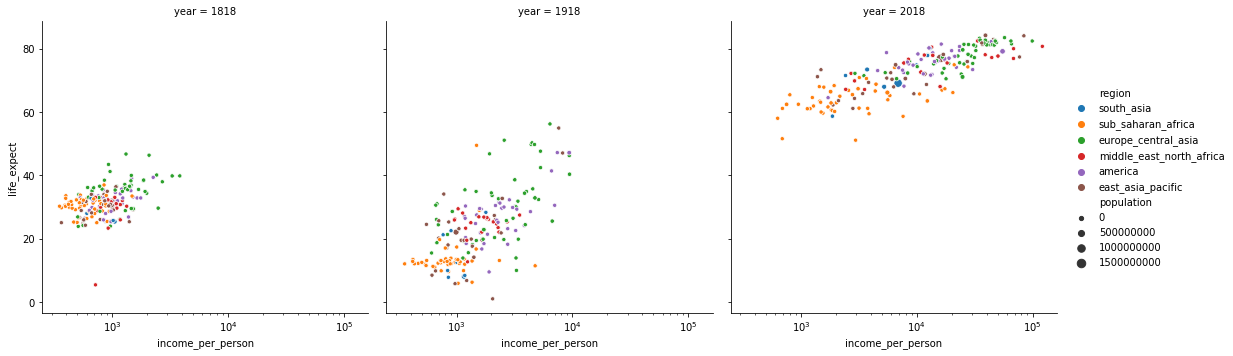

In [0]:
years = [1818, 1918, 2018]

centuries = munge_df[munge_df.year.isin(years)]

sns.relplot(x='income_per_person', y='life_expect', hue='region', 
            size='population', col='year', data=centuries);
plt.xscale('log');

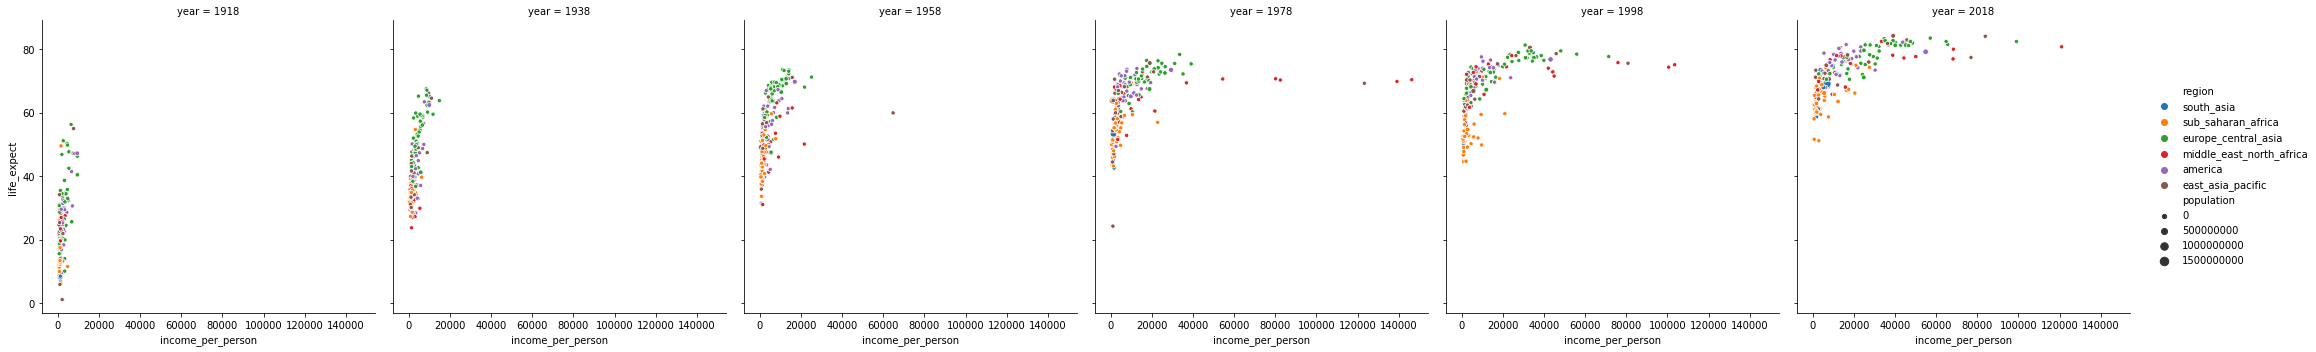

In [0]:
scores = [1918, 1938, 1958, 1978, 1998, 2018]

decades = munge_df[munge_df.year.isin(scores)]

sns.relplot(x='income_per_person', y='life_expect', hue='region', 
            size='population',col='year', data=decades);


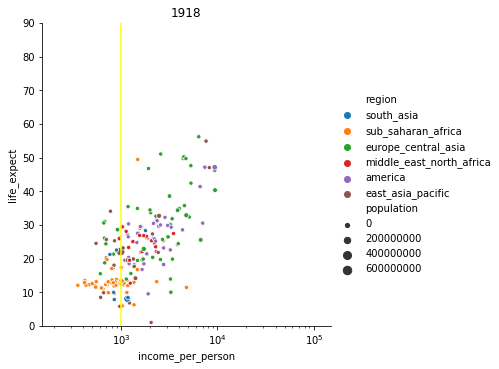

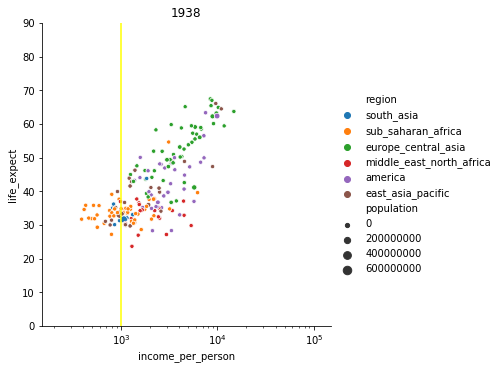

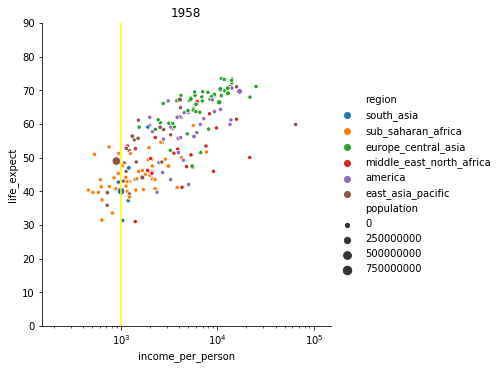

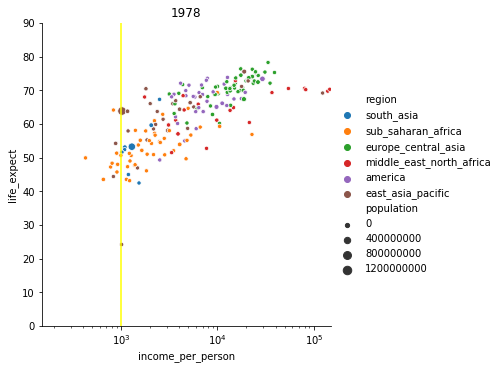

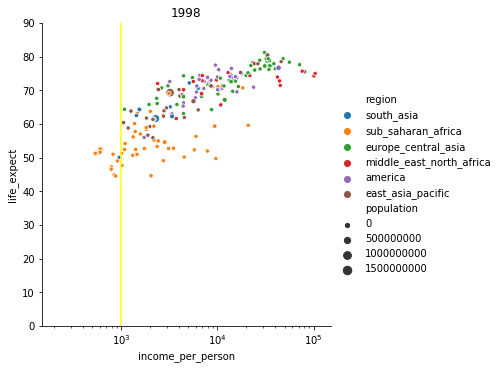

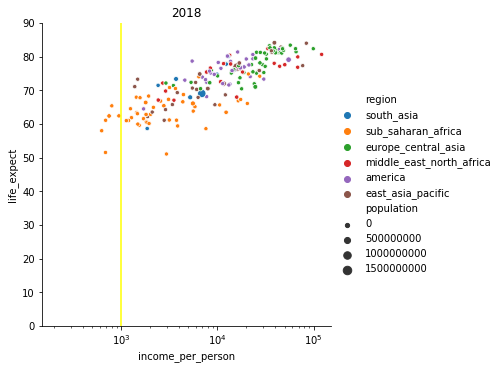

In [0]:
for year in scores:
  sns.relplot(x='income_per_person', y='life_expect', hue='region', 
              size='population', data=munge_df[munge_df.year==year])
  
  plt.xscale('log')
  plt.xlim((150,150000))
  plt.ylim((0,90))
  plt.title(year)
  plt.axvline(x=1000, color='yellow')

In [0]:
munge_df[(munge_df.year==1918) & (munge_df.life_expect > 50)]

,country,region,year,income_per_person,life_expect,population
1698,Australia,east_asia_pacific,1918,7610,54.95,5066003
10067,Denmark,europe_central_asia,1918,6393,56.24,3165276
17513,Iceland,europe_central_asia,1918,2576,51.11,115504
27196,Norway,europe_central_asia,1918,4479,50.28,2576646


In [0]:
munge_df[(munge_df.year==2018) & (munge_df.life_expect < 60)]

,country,region,year,income_per_person,life_expect,population
218,Afghanistan,south_asia,2018,1867,58.69,36373176
6178,Central African Republic,sub_saharan_africa,2018,689,51.58,4737423
14328,Guinea-Bissau,sub_saharan_africa,2018,1547,59.66,1907268
21774,Lesotho,sub_saharan_africa,2018,2960,51.12,2263010
32771,Somalia,sub_saharan_africa,2018,629,58.03,15181925
34523,Swaziland,sub_saharan_africa,2018,7604,58.64,1391385
40217,Zambia,sub_saharan_africa,2018,3865,59.45,17609178


## Analyze outliers

In [0]:
#did that

## Plot multiple years

In [0]:
#did that

## Point out a story

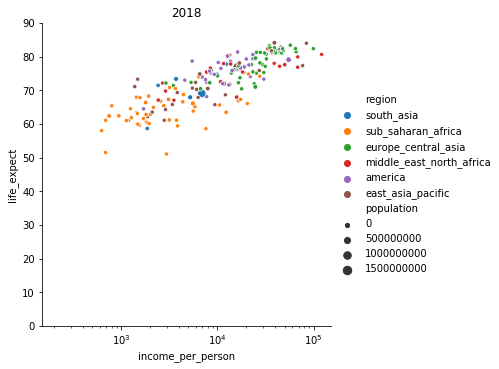

In [0]:
year = 2018 #@param {type:"slider", min:1800, max:2018, step:1}

sns.relplot(x='income_per_person', y='life_expect', hue='region', size='population',
           data=munge_df[munge_df.year==year])

plt.xscale('log')
plt.xlim((150, 150000))
plt.ylim((0,90))
plt.title(year);

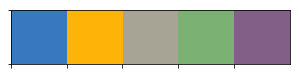

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

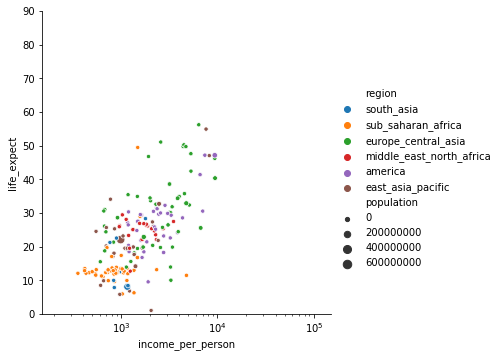

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

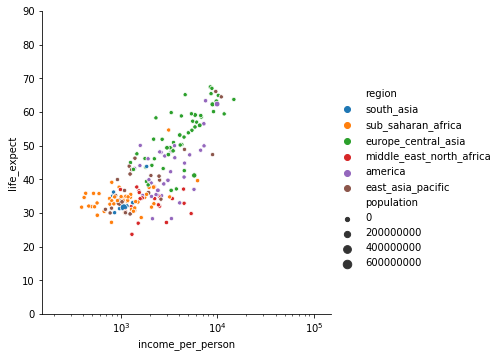

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

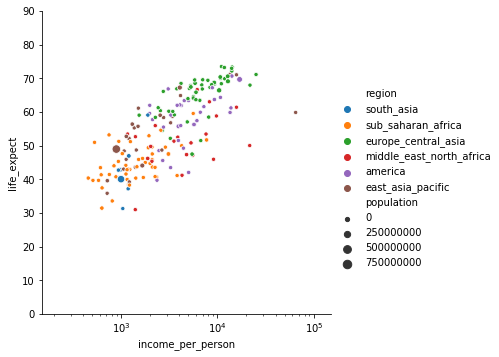

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

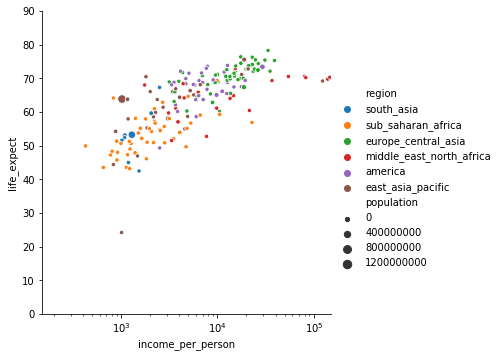

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

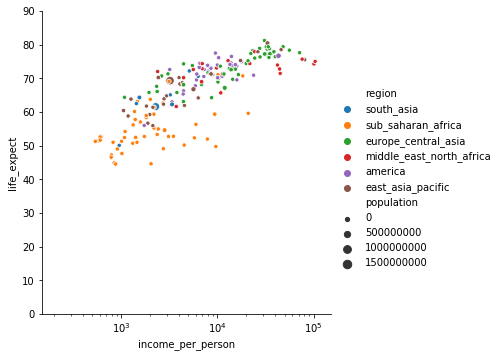

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

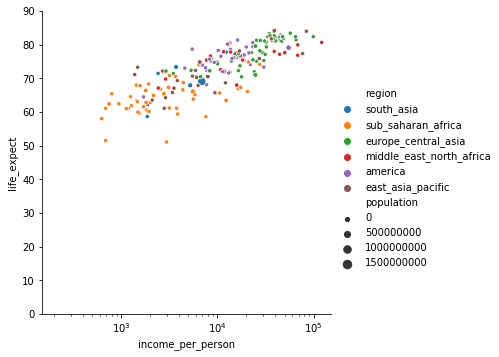

<IPython.core.display.Javascript object>

In [0]:
colors = ['windows blue', 'amber', 'greyish', 'faded green', 'dusty purple']
sns.palplot(sns.xkcd_palette(colors));

from google.colab import widgets
tb = widgets.TabBar([str(year) for year in scores])
for tab, year in zip(tb,scores):
    sns.relplot(x='income_per_person', y='life_expect', hue='region', 
                size='population', data=munge_df[munge_df.year==year])
  
    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((0,90));

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project